In [1]:
import proplot as plot
import numpy as np

## Swenson2012

https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012JD018178

The fractional snow-covered area parameterization used in CLM4 was developed by Niu and Yang [2007] (hereafter referred to as NY07), who examined the rela- tionship between SCF derived from Advanced Very High Resolution Radiometer (AVHRR) observations and snow depth from the Canadian Meteorological Centre’s (CMC) analysis, both at 1? by 1? spatial resolution and monthly temporal resolution. NY07 observed that SCF generally increases as a function of snow depth before saturating at a value of 1 at snow depths of the order of a few tens of centimeters. It was also observed that the average slope of the snow depth–SCF scatterplots was lower during the spring than during the autumn, while the average snow density (based on the CMC analysis) increased. Based on these observations, NY07 proposed the following empirical SCF parameterization:

$$
F=\tanh \left(\frac{d}{2.5 z_{0 g}\left(\rho_{\text {snow}} / \rho_{\text {new}}\right)^{m}}\right)
$$

where d is grid cell average snow depth, z0g = 0.01 is called the ground roughness length, rsnow is the snow density, rnew = 100 kg/m3 is the density of new snow, and m is an empirical constant. The value of m given by NY07 is 1.6, while the value of m used in CLM4 is 1.0.

In [36]:
# Add (1+std/200) (au pif parait pas mal ?)

def F_NY07(d, z0, rho_snow, rho_new, m, std):
     return np.tanh( d / ( 2.5 * z0 * (rho_snow * (1+std/200) /rho_new)**m ) )*100

In [37]:
d = plot.arange(0,1,0.01) # grid cell average snow depth [m]
z0 = 0.01 # ground roughness length [m]
rho_snow = 300 # snow density [kg/m3]
rho_new = 100 # density of new snow [kg/m3]
m = 1.6 # The value of m given by NY07 is 1.6, while the value of m used in CLM4 is 1.0
std = 200

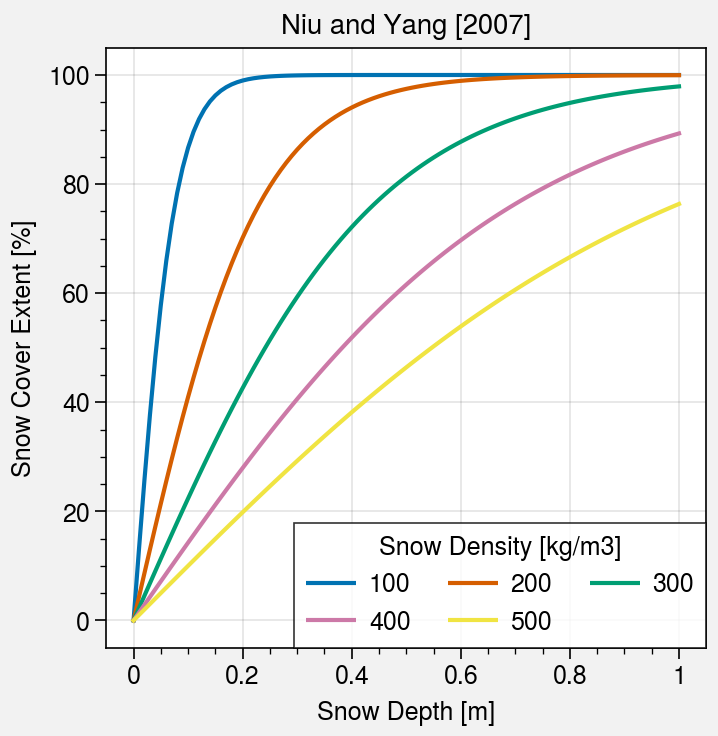

In [38]:
rho_snow_list = plot.arange(100,500,100)

fig, axs = plot.subplots(axwidth=3)

axs.format(
    xlabel='Snow Depth [m]',
    ylabel='Snow Cover Extent [%]',
    title='Niu and Yang [2007]'
)

hs = []
for rho_snow in rho_snow_list:
    y = F_NY07(d, z0, rho_snow, rho_new, m, std)
    h = axs[0].plot(d, y, label=rho_snow)
    hs.append(h)

axs.legend(hs, label='Snow Density [kg/m3]')